In [22]:
import pandas as pd
import pmdarima as pm
from sklearn.metrics import mean_absolute_percentage_error

In [23]:
%store -r date_list
%store -r cpi_list
%store -r ppi_list
%store -r unemployed_ratio_list
%store -r update_sp500

In [68]:
case_sp500 = pd.DataFrame()
case_sp500['date'] = date_list
case_sp500['cpi'] = cpi_list
case_sp500['ppi'] = ppi_list
case_sp500['unemployment_ratio'] = unemployed_ratio_list
case_sp500_update = pd.concat([case_sp500, update_sp500], axis=1).dropna()
case_sp500_update['date'] = pd.to_datetime(case_sp500_update['date'])
case_sp500_update = case_sp500_update.set_index('date')
find_sp500_case = case_sp500_update.resample('M').mean()
find_sp500_case_optimized = find_sp500_case['20090131':'20191231']
train=find_sp500_case_optimized[(find_sp500_case_optimized.index.get_level_values(0) <= '2015-08-31')]
test=find_sp500_case_optimized[(find_sp500_case_optimized.index.get_level_values(0) > '2015-08-31')]
copy_test = test[:]

In [69]:
model_sp500_modified_three_variables = pm.auto_arima(train.Price, 
                        exogenous = train[['cpi', 'ppi','unemployment_ratio']], 
                        D=1, 
                        test='adf',
                        m=12,
                        error_action='ignore',  
                        suppress_warnings=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=752.037, Time=1.49 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=773.603, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=753.880, Time=0.70 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.63 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=inf, Time=1.20 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=inf, Time=1.31 sec
 ARIMA(2,1,2)(2,1,1)[12]             : AIC=753.756, Time=3.53 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=inf, Time=3.68 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(2,1,2)(0,1,2)[12]             : AIC=751.908, Time=2.90 sec
 ARIMA(1,1,2)(0,1,2)[12]             : AIC=inf, Time=2.73 sec
 ARIMA(2,1,1)(0,1,2)[12]             : AIC=inf, Time=2.49 sec
 ARIMA(3,1,2)(0,1,2)[12]             : AIC=inf, Time=3.44 sec
 ARIMA(2,1,3)(0,1,2)[12]             : AIC=753.760, Time=3.77 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=2.41 sec
 AR

In [70]:
model_sp500_modified_three_variables.fit(train.Price, exogenous = train[['cpi', 'ppi','unemployment_ratio']])
model_sp500_modified_three_variables.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   80
Model:             SARIMAX(2, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -365.954
Date:                            Fri, 10 Mar 2023   AIC                            751.908
Time:                                    01:26:36   BIC                            773.955
Sample:                                01-31-2009   HQIC                           760.632
                                     - 08-31-2015                                         
Covariance Type:                              opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
cpi                  -24.3605     22.573     -1.079      0.281     -68.603      19.882
ppi                   14.7419      8.705      1.693      0.090      -2.320      31.804
unemployment_ratio   -14.5284     36.368     -0.399      0.690     -85.808      56.751
ar.L1                 -0.7664      1.015     -0.755      0.450      -2.756       1.223
ar.L2                 -0.5504      0.545     -1.010      0.313      -1.619       0.518
ma.L1                  0.5284      1.076      0.491      0.623      -1.581       2.638
ma.L2                  0.4880      0.349      1.397      0.162      -0.197       1.173
ma.S.L12              -0.9382      0.334     -2.813      0.005      -1.592      -0.285
ma.S.L24               0.1455      0.197      0.739      0.460      -0.240       0.531
sigma2              2664.4140    859.276      3.101      0.002     980.264    4348.564
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 2.71
Prob(Q):                              0.79   Prob(JB):                         0.26
Heteroskedasticity (H):               0.64   Skew:                            -0.49
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
modified_model_sp500_cpi = pm.auto_arima(train.cpi, 
                        D=1, 
                        test='adf',
                        m=12,
                        error_action='ignore',  
                        suppress_warnings=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,1,1)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=167.208, Time=0.01 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=158.930, Time=0.08 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=143.247, Time=0.31 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=152.470, Time=0.08 sec
 ARIMA(0,2,1)(1,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(0,2,1)(0,1,2)[12]             : AIC=inf, Time=0.89 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(0,2,1)(1,1,2)[12]             : AIC=inf, Time=1.65 sec
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=157.621, Time=0.21 sec
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(0,2,2)(0,1,1)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=154.476, Time=0.17 sec
 ARIMA(1,2,2)(0,1,1)[12]             : AIC=inf, Time=0.83 sec
 ARIMA(0,2,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.55 sec

Be

In [72]:
test['cpi']

date
2015-09-30    237.945
2015-10-31    237.838
2015-11-30    237.336
2015-12-31    236.525
2016-01-31    236.916
2016-02-29    237.111
2016-03-31    238.132
2016-04-30    239.261
2016-05-31    240.229
2016-06-30    241.018
2016-07-31    240.628
2016-08-31    240.849
2016-09-30    241.428
2016-10-31    241.729
2016-11-30    241.353
2016-12-31    241.432
2017-01-31    242.839
2017-02-28    243.603
2017-03-31    243.801
2017-04-30    244.524
2017-05-31    244.733
2017-06-30    244.955
2017-07-31    244.786
2017-08-31    245.519
2017-09-30    246.819
2017-10-31    246.663
2017-11-30    246.669
2017-12-31    246.524
2018-01-31    247.867
2018-02-28    248.991
2018-03-31    249.554
2018-04-30    250.546
2018-05-31    251.588
2018-06-30    251.989
2018-07-31    252.006
2018-08-31    252.146
2018-09-30    252.439
2018-10-31    252.885
2018-11-30    252.038
2018-12-31    251.233
2019-01-31    251.712
2019-02-28    252.776
2019-03-31    254.202
2019-04-30    255.548
2019-05-31    256.092
2019-

/Users/peter/Library/Python/3.6/lib/python/site-packages/IPython/core/interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


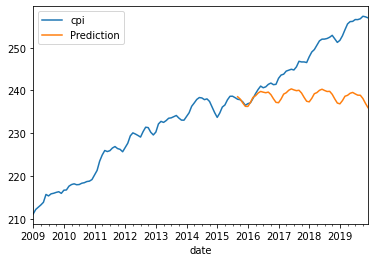

In [73]:
predict_cpi = modified_model_sp500_cpi.predict(n_periods=len(test), return_conf_int=True)
cpi_tmp = pd.DataFrame(predict_cpi[0], index = test.index, columns=['Prediction'])
pd.concat([find_sp500_case_optimized['cpi'],cpi_tmp],axis=1).plot()
for i in range(len(test)):
    test['cpi'][i] = predict_cpi[0][i]

In [74]:
test['cpi']

date
2015-09-30    238.520828
2015-10-31    237.985942
2015-11-30    237.081277
2015-12-31    236.288678
2016-01-31    236.264630
2016-02-29    237.193880
2016-03-31    238.383767
2016-04-30    238.763740
2016-05-31    239.403087
2016-06-30    239.772598
2016-07-31    239.595709
2016-08-31    239.468108
2016-09-30    239.617007
2016-10-31    239.026193
2016-11-30    238.065599
2016-12-31    237.217071
2017-01-31    237.137094
2017-02-28    238.010415
2017-03-31    239.144374
2017-04-30    239.468418
2017-05-31    240.051836
2017-06-30    240.365418
2017-07-31    240.132601
2017-08-31    239.949071
2017-09-30    240.042041
2017-10-31    239.395299
2017-11-30    238.378776
2017-12-31    237.474319
2018-01-31    237.338414
2018-02-28    238.155806
2018-03-31    239.233836
2018-04-30    239.501951
2018-05-31    240.029441
2018-06-30    240.287094
2018-07-31    239.998348
2018-08-31    239.758889
2018-09-30    239.795931
2018-10-31    239.093259
2018-11-30    238.020808
2018-12-31    237.06

In [75]:
modified_model_sp500_ppi = pm.auto_arima(train.ppi, 
                        D=1, 
                        test='adf',
                        m=12,
                        error_action='ignore',  
                        suppress_warnings=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,1,1)[12]             : AIC=inf, Time=0.99 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=291.511, Time=0.01 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=274.467, Time=0.05 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=263.942, Time=0.14 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=269.858, Time=0.05 sec
 ARIMA(0,2,1)(1,1,1)[12]             : AIC=265.549, Time=0.29 sec
 ARIMA(0,2,1)(0,1,2)[12]             : AIC=265.610, Time=0.57 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=266.090, Time=0.10 sec
 ARIMA(0,2,1)(1,1,2)[12]             : AIC=267.524, Time=0.94 sec
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=282.721, Time=0.06 sec
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=inf, Time=0.65 sec
 ARIMA(0,2,2)(0,1,1)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=271.662, Time=0.10 sec
 ARIMA(1,2,2)(0,1,1)[12]             : AIC=inf, Time=0.85 sec
 ARIMA(0,2,1)(0,1,1)[12] intercept   : AIC=inf, T

In [76]:
test['ppi']

date
2015-09-30    184.3
2015-10-31    183.7
2015-11-30    182.9
2015-12-31    180.8
2016-01-31    179.7
2016-02-29    178.7
2016-03-31    179.3
2016-04-30    180.5
2016-05-31    181.9
2016-06-30    183.6
2016-07-31    183.4
2016-08-31    182.5
2016-09-30    183.0
2016-10-31    183.7
2016-11-30    183.2
2016-12-31    183.9
2017-01-31    185.6
2017-02-28    186.2
2017-03-31    186.7
2017-04-30    187.6
2017-05-31    187.3
2017-06-30    187.6
2017-07-31    187.3
2017-08-31    188.4
2017-09-30    189.6
2017-10-31    190.2
2017-11-30    191.2
2017-12-31    191.3
2018-01-31    192.6
2018-02-28    193.5
2018-03-31    194.0
2018-04-30    195.3
2018-05-31    197.7
2018-06-30    198.4
2018-07-31    198.5
2018-08-31    198.6
2018-09-30    198.9
2018-10-31    200.4
2018-11-30    198.4
2018-12-31    195.2
2019-01-31    194.3
2019-02-28    195.4
2019-03-31    197.4
2019-04-30    199.2
2019-05-31    199.1
2019-06-30    197.0
2019-07-31    197.5
2019-08-31    196.4
2019-09-30    195.9
2019-10-31    1

/Users/peter/Library/Python/3.6/lib/python/site-packages/IPython/core/interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


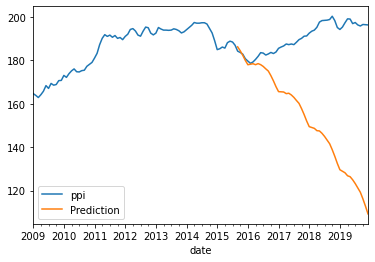

In [77]:
predict_ppi = modified_model_sp500_ppi.predict(n_periods=len(test), return_conf_int=True)
ppi_tmp = pd.DataFrame(predict_ppi[0], index = test.index, columns=['Prediction'])
# print(ppi_tmp)
pd.concat([find_sp500_case_optimized['ppi'],ppi_tmp],axis=1).plot()
for i in range(len(test)):
    test['ppi'][i] = ppi_tmp['Prediction'][i]


In [78]:
test['ppi']

date
2015-09-30    186.286945
2015-10-31    184.490125
2015-11-30    182.382188
2015-12-31    180.012896
2016-01-31    178.032479
2016-02-29    178.283453
2016-03-31    178.495383
2016-04-30    178.051283
2016-05-31    178.542829
2016-06-30    178.059453
2016-07-31    177.247408
2016-08-31    176.134544
2016-09-30    175.110743
2016-10-31    173.003176
2016-11-30    170.584492
2016-12-31    167.904453
2017-01-31    165.613290
2017-02-28    165.553517
2017-03-31    165.454699
2017-04-30    164.699853
2017-05-31    164.880652
2017-06-30    164.086529
2017-07-31    162.963737
2017-08-31    161.540127
2017-09-30    160.205578
2017-10-31    157.787265
2017-11-30    155.057834
2017-12-31    152.067048
2018-01-31    149.465138
2018-02-28    149.094618
2018-03-31    148.685054
2018-04-30    147.619461
2018-05-31    147.489513
2018-06-30    146.384643
2018-07-31    144.951104
2018-08-31    143.216747
2018-09-30    141.571451
2018-10-31    138.842391
2018-11-30    135.802213
2018-12-31    132.50

In [79]:
modified_model_sp500_unemployed = pm.auto_arima(train.unemployment_ratio, 
                        D=1, 
                        test='adf',
                        m=12,
                        error_action='ignore',  
                        suppress_warnings=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=4.02 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=133.445, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2.460, Time=0.51 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=84.688, Time=0.51 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=182.690, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=20.301, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2.534, Time=5.12 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.18 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=135.436, Time=0.11 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=4.346, Time=0.55 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=4.364, Time=0.58 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=84.798, Time=0.27 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept   : AIC=6.171, Time=0.84 

In [80]:
test['unemployment_ratio']

date
2015-09-30    5.0
2015-10-31    5.0
2015-11-30    5.1
2015-12-31    5.0
2016-01-31    4.8
2016-02-29    4.9
2016-03-31    5.0
2016-04-30    5.1
2016-05-31    4.8
2016-06-30    4.9
2016-07-31    4.8
2016-08-31    4.9
2016-09-30    5.0
2016-10-31    4.9
2016-11-30    4.7
2016-12-31    4.7
2017-01-31    4.7
2017-02-28    4.6
2017-03-31    4.4
2017-04-30    4.4
2017-05-31    4.4
2017-06-30    4.3
2017-07-31    4.3
2017-08-31    4.4
2017-09-30    4.3
2017-10-31    4.2
2017-11-30    4.2
2017-12-31    4.1
2018-01-31    4.0
2018-02-28    4.1
2018-03-31    4.0
2018-04-30    4.0
2018-05-31    3.8
2018-06-30    4.0
2018-07-31    3.8
2018-08-31    3.8
2018-09-30    3.7
2018-10-31    3.8
2018-11-30    3.8
2018-12-31    3.9
2019-01-31    4.0
2019-02-28    3.8
2019-03-31    3.8
2019-04-30    3.6
2019-05-31    3.6
2019-06-30    3.6
2019-07-31    3.7
2019-08-31    3.7
2019-09-30    3.5
2019-10-31    3.6
2019-11-30    3.6
2019-12-31    3.6
Freq: M, Name: unemployment_ratio, dtype: float64

/Users/peter/Library/Python/3.6/lib/python/site-packages/IPython/core/interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


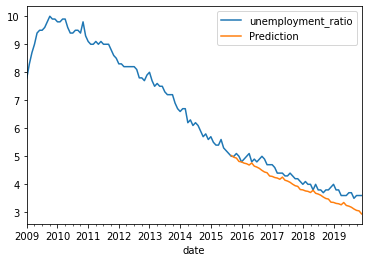

In [81]:
predict_unemployed = modified_model_sp500_unemployed.predict(n_periods=len(test), return_conf_int=True)
unemploy_tmp = pd.DataFrame(predict_unemployed[0], index = test.index, columns=['Prediction'])
pd.concat([find_sp500_case_optimized['unemployment_ratio'],unemploy_tmp],axis=1).plot()
for i in range(52):
    test['unemployment_ratio'][i] = predict_unemployed[0][i]

In [82]:
test['unemployment_ratio']

date
2015-09-30    5.026628
2015-10-31    4.966107
2015-11-30    4.936577
2015-12-31    4.816869
2016-01-31    4.799986
2016-02-29    4.756539
2016-03-31    4.734430
2016-04-30    4.688965
2016-05-31    4.761941
2016-06-30    4.648970
2016-07-31    4.615543
2016-08-31    4.567243
2016-09-30    4.497059
2016-10-31    4.439706
2016-11-30    4.413325
2016-12-31    4.296748
2017-01-31    4.282976
2017-02-28    4.242623
2017-03-31    4.223589
2017-04-30    4.181181
2017-05-31    4.257194
2017-06-30    4.147243
2017-07-31    4.116818
2017-08-31    4.071502
2017-09-30    4.004284
2017-10-31    3.949879
2017-11-30    3.926429
2017-12-31    3.812764
2018-01-31    3.801889
2018-02-28    3.764413
2018-03-31    3.748240
2018-04-30    3.708676
2018-05-31    3.787517
2018-06-30    3.680375
2018-07-31    3.652744
2018-08-31    3.610204
2018-09-30    3.545746
2018-10-31    3.494084
2018-11-30    3.473361
2018-12-31    3.362407
2019-01-31    3.354226
2019-02-28    3.319429
2019-03-31    3.305918
2019-0

In [83]:
test

,cpi,ppi,unemployment_ratio,Price
date,,,,
2015-09-30,238.520828,186.286945,5.026628,1920.03
2015-10-31,237.985942,184.490125,4.966107,2079.36
2015-11-30,237.081277,182.382188,4.936577,2080.41
2015-12-31,236.288678,180.012896,4.816869,2043.94
2016-01-31,236.264630,178.032479,4.799986,1940.24
2016-02-29,237.193880,178.283453,4.756539,1932.23
2016-03-31,238.383767,178.495383,4.734430,2059.74
2016-04-30,238.763740,178.051283,4.688965,2065.30
2016-05-31,239.403087,178.542829,4.761941,2096.96


0.1735151458218772

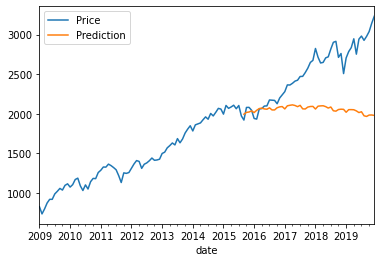

In [84]:
forecast=model_sp500_modified_three_variables.predict(n_periods=len(test), exogenous = test[['cpi', 'ppi','unemployment_ratio']], return_conf_int=True)
arima_df_2 = pd.DataFrame(forecast[0], index = test.index, columns=['Prediction'])
pd.concat([find_sp500_case_optimized['Price'],arima_df_2],axis=1).plot()
mean_absolute_percentage_error(test.Price, arima_df_2['Prediction'])

In [96]:
model_sp500_2 = pm.auto_arima(train.Price, 
                        exogenous = train[['cpi', 'ppi']], 
                        D=1, 
                        test='adf',
                        m=12,
                        error_action='ignore',  
                        suppress_warnings=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=1.98 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=771.795, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=751.898, Time=0.59 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=767.912, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=748.806, Time=2.34 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=746.297, Time=3.82 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.51 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=3.19 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=3.18 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=748.479, Time=2.05 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=748.267, Time=4.27 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=748.283, Time=3.18 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=746.793, Time=2.96 sec
 ARIMA(2,1,1)(2,1,1)[12]             : AIC=inf, Time=

In [97]:
model_sp500_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   80
Model:             SARIMAX(1, 1, 0)x(2, 1, [1], 12)   Log Likelihood                -366.148
Date:                              Mon, 13 Mar 2023   AIC                            746.297
Time:                                      00:39:04   BIC                            761.730
Sample:                                  01-31-2009   HQIC                           752.404
                                       - 08-31-2015                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cpi          -22.9577     20.874     -1.100      0.271     -63.870      17.955
ppi           14.5710      8.114      1.796      0.073      -1.332      30.474
ar.L1         -0.2681      0.154     -1.737      0.082      -0.571       0.034
ar.S.L12      -0.1739      0.319     -0.546      0.585      -0.798       0.451
ar.S.L24      -0.1085      0.260     -0.418      0.676      -0.618       0.401
ma.S.L12      -0.7748      0.526     -1.472      0.141      -1.806       0.257
sigma2      2618.6829    885.235      2.958      0.003     883.653    4353.712
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 2.74
Prob(Q):                              0.79   Prob(JB):                         0.25
Heteroskedasticity (H):               0.75   Skew:                            -0.49
Prob(H) (two-sided):                  0.51   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

0.17382461373558045

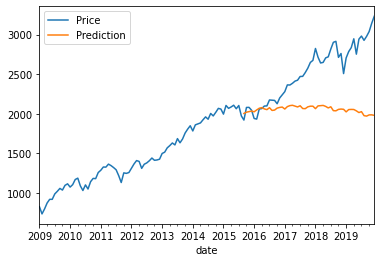

In [98]:
forecast=model_sp500_2.predict(n_periods=len(test), exogenous = test[['cpi', 'ppi']], return_conf_int=True)
arima_df_3 = pd.DataFrame(forecast[0], index = test.index, columns=['Prediction'])
pd.concat([find_sp500_case_optimized['Price'],arima_df_3],axis=1).plot()
mean_absolute_percentage_error(test.Price, arima_df_3['Prediction'])

In [94]:
m_data_arima_variable = arima_df_3.reset_index()
%store m_data_arima_variable

Stored 'm_data_arima_variable' (DataFrame)


In [99]:
model_sp500_modified_nonfarm = pm.auto_arima(train.Price, 
                        exogenous = train[['unemployment_ratio']], 
                        D=1, 
                        test='adf',
                        m=12,
                        error_action='ignore',  
                        suppress_warnings=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=754.558, Time=1.38 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=771.197, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=753.130, Time=0.42 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=770.399, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=751.107, Time=1.50 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=749.044, Time=2.33 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=747.213, Time=0.78 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=1.91 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=747.073, Time=1.09 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=747.583, Time=1.04 sec
 ARIMA(2,1,0)(0,1,2)[12]             : AIC=748.996, Time=1.87 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=1.65 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=747.08

0.047685492516269974

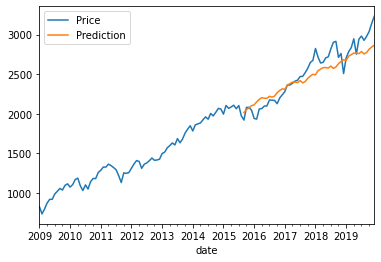

In [100]:
forecast=model_sp500_modified_nonfarm.predict(n_periods=len(test), exogenous = test[['unemployment_ratio']], return_conf_int=True)
arima_df_3 = pd.DataFrame(forecast[0], index = test.index, columns=['Prediction'])
pd.concat([find_sp500_case_optimized['Price'],arima_df_3],axis=1).plot()
mean_absolute_percentage_error(test.Price, arima_df_3['Prediction'])